<a href="https://colab.research.google.com/github/navarro1113/Assigment/blob/main/Practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practica 3**

In [10]:
from google.colab import files

# Subir archivo desde tu computadora local
uploaded = files.upload()

# Ahora podrás cargar las imágenes con cv2 desde el archivo subido

Saving COVID-1000.png to COVID-1000.png
Saving COVID-1002.png to COVID-1002.png


Carga de Imágenes

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imágenes (cambiar nombres si es necesario)
img1 = cv2.imread("COVID-1000.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("COVID-1002.png", cv2.IMREAD_GRAYSCALE)

# Comprobar si se cargaron correctamente
if img1 is None or img2 is None:
    print("Error al cargar las imágenes")
else:
    print("Imágenes cargadas correctamente")

# Redimensionar si no tienen el mismo tamaño
alto, ancho = img1.shape
img2 = cv2.resize(img2, (ancho, alto))


Imágenes cargadas correctamente


## 1. Suma promedio y ponderada de imágenes

- **Suma promedio**: Promedia los valores de píxeles de ambas imágenes.
- **Suma ponderada**: Combina las imágenes asignando pesos distintos a cada una usando `cv2.addWeighted`.


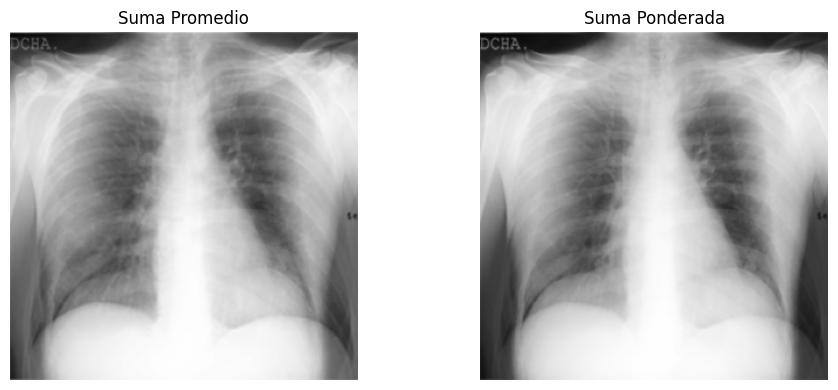

In [14]:
# Suma promedio
suma_promedio = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

# Suma ponderada
suma_ponderada = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

# Mostrar resultados
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(suma_promedio, cmap='gray')
plt.title("Suma Promedio")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(suma_ponderada, cmap='gray')
plt.title("Suma Ponderada")
plt.axis("off")

plt.tight_layout()
plt.show()


## 2. Resta de imágenes

Se realizó la resta absoluta de las dos imágenes utilizando `cv2.absdiff`, que calcula la diferencia píxel a píxel.


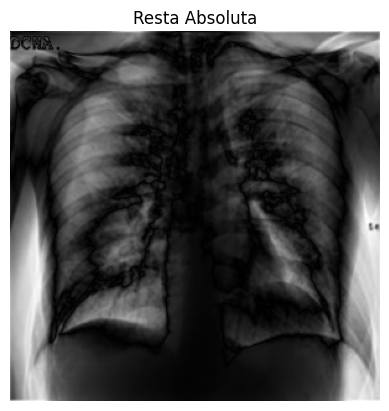

In [15]:
resta = cv2.absdiff(img1, img2)

plt.imshow(resta, cmap='gray')
plt.title("Resta Absoluta")
plt.axis("off")
plt.show()


## 3. Multiplicación de imágenes

- **Multiplicación normal**: Se realiza con `cv2.multiply`.
- **Multiplicación elemento a elemento**: Se usa la multiplicación directa entre matrices (`*`) y luego se normaliza.


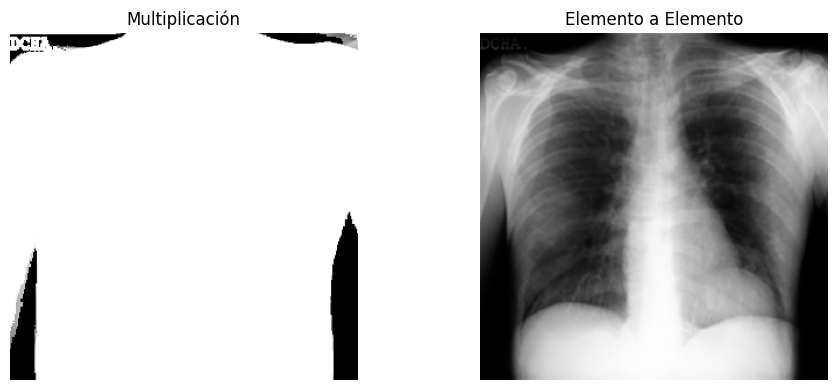

In [16]:
# Multiplicación normal
multiplicacion = cv2.multiply(img1, img2)

# Multiplicación elemento a elemento (normalizada)
multi_elemento = (img1.astype(np.float32) * img2.astype(np.float32)) / 255
multi_elemento = np.clip(multi_elemento, 0, 255).astype(np.uint8)

# Mostrar resultados
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(multiplicacion, cmap='gray')
plt.title("Multiplicación")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(multi_elemento, cmap='gray')
plt.title("Elemento a Elemento")
plt.axis("off")

plt.tight_layout()
plt.show()


## 4. Operaciones Lógicas entre Imágenes

Las imágenes se convirtieron a binario (blanco y negro) antes de aplicar operaciones lógicas.

- **AND**: Coincidencias blancas entre ambas imágenes.
- **OR**: Blanco si al menos una tiene blanco.
- **XOR**: Blanco si solo una tiene blanco.
- **NOT**: Inversión de blancos y negros.


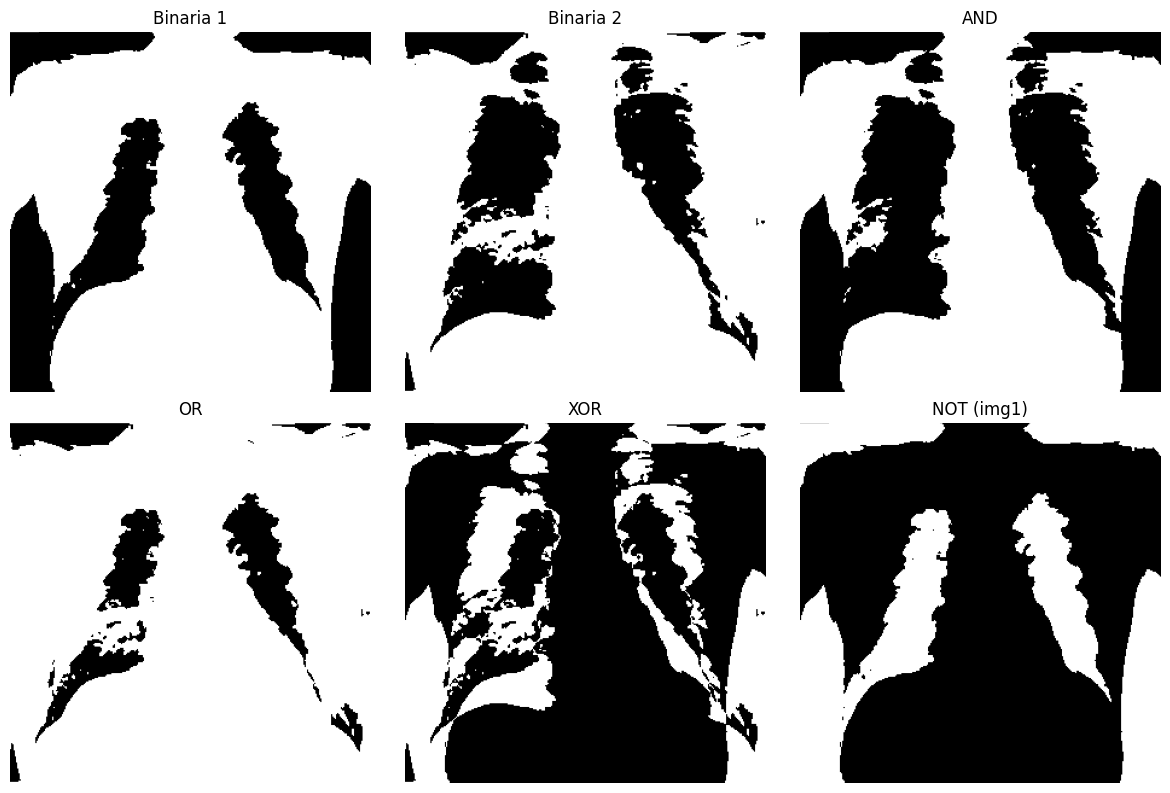

In [17]:
# Umbralizar imágenes
_, bin1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)

# Operaciones lógicas
img_and = cv2.bitwise_and(bin1, bin2)
img_or  = cv2.bitwise_or(bin1, bin2)
img_xor = cv2.bitwise_xor(bin1, bin2)
img_not = cv2.bitwise_not(bin1)

# Mostrar
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(bin1, cmap='gray')
plt.title("Binaria 1")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(bin2, cmap='gray')
plt.title("Binaria 2")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(img_and, cmap='gray')
plt.title("AND")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(img_or, cmap='gray')
plt.title("OR")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(img_xor, cmap='gray')
plt.title("XOR")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(img_not, cmap='gray')
plt.title("NOT (img1)")
plt.axis("off")

plt.tight_layout()
plt.show()
